In [1]:
import sys
sys.path.insert(0, r"C:\users\pairwin\Documents\Github\HelperPI")
#sys.path.insert(0, r'/home/pirwin/Git/HelperPI')

import HelperPI
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.formula.api as sts
import numpy as np

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [2]:
helper = HelperPI.Helper()

INFO:root:Initializing...


In [3]:
#sql = helper.getSQL(r"C:\users\pairwin\Documents\GitHub\IPy_Notebooks\SQL\TAB_MODELING.sql")

In [4]:
#base, dtypesdf = helper.readData(sql)
base = pd.read_csv(r'C:\users\pairwin\Documents\GitHub\IPy_Notebooks\SQL\tab_model.csv', parse_dates=['DATE_VALUE'])
#base = pd.read_csv(r'/home/pirwin/Git/IPy_Notebooks/SQL/tab_model.csv',parse_dates=['DATE_VALUE'])
dtypes = helper.getDtypes(base)

                  Count     Column Type
0            DATE_VALUE  datetime64[ns]
1                RECORD          object
2            MEDHINC_CY         float64
3             MEDAGE_CY         float64
4            CLOSEST_BP         float64
5           CLOSEST_CAB         float64
6     MALES_IN_HOUSHOLD           int64
7   FEMALES_IN_HOUSHOLD           int64
8      REWARDS_CUSTOMER           int64
9      DAYS_AS_CUSTOMER           int64
10   TOTAL_TRANSACTIONS           int64
11     REW_TRANSACTIONS           int64
12          TOTAL_SPEND         float64
13  DAYS_SINCE_PURCHASE           int64
14     TARGET_VALUE12MO         float64
15  TARGET_PURCH_NEXT15           int64


### Imputing missing then Splitting the data for train and test using helper application

In [141]:
collist = ['MEDHINC_CY','MEDAGE_CY','CLOSEST_BP','MALES_IN_HOUSHOLD','FEMALES_IN_HOUSHOLD','REWARDS_CUSTOMER',
          'DAYS_AS_CUSTOMER','TOTAL_TRANSACTIONS','REW_TRANSACTIONS','TOTAL_SPEND','DAYS_SINCE_PURCHASE']
X = base[collist]
y = base['TARGET_PURCH_NEXT15']

### Determination of missing values

In [142]:
missing_df = X.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / X.shape[0]
missing_df.loc[missing_df['missing_ratio']>0.01]

,column_name,missing_count,missing_ratio
0,MEDHINC_CY,3980,0.0398
1,MEDAGE_CY,3980,0.0398


In [149]:
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import train_test_split
imr = Imputer(missing_values='NaN',strategy='median',axis=0)
imr = imr.fit(X)
imputed_data = imr.transform(X.values)

train_X, test_X, train_y, test_y = train_test_split(imputed_data, y, test_size=0.3, random_state=0)

train_X = pd.DataFrame(train_X, columns=collist)
test_X = pd.DataFrame(test_X, columns=collist)

In [150]:
train_X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 11 columns):
MEDHINC_CY             70000 non-null float64
MEDAGE_CY              70000 non-null float64
CLOSEST_BP             70000 non-null float64
MALES_IN_HOUSHOLD      70000 non-null float64
FEMALES_IN_HOUSHOLD    70000 non-null float64
REWARDS_CUSTOMER       70000 non-null float64
DAYS_AS_CUSTOMER       70000 non-null float64
TOTAL_TRANSACTIONS     70000 non-null float64
REW_TRANSACTIONS       70000 non-null float64
TOTAL_SPEND            70000 non-null float64
DAYS_SINCE_PURCHASE    70000 non-null float64
dtypes: float64(11)
memory usage: 5.9 MB


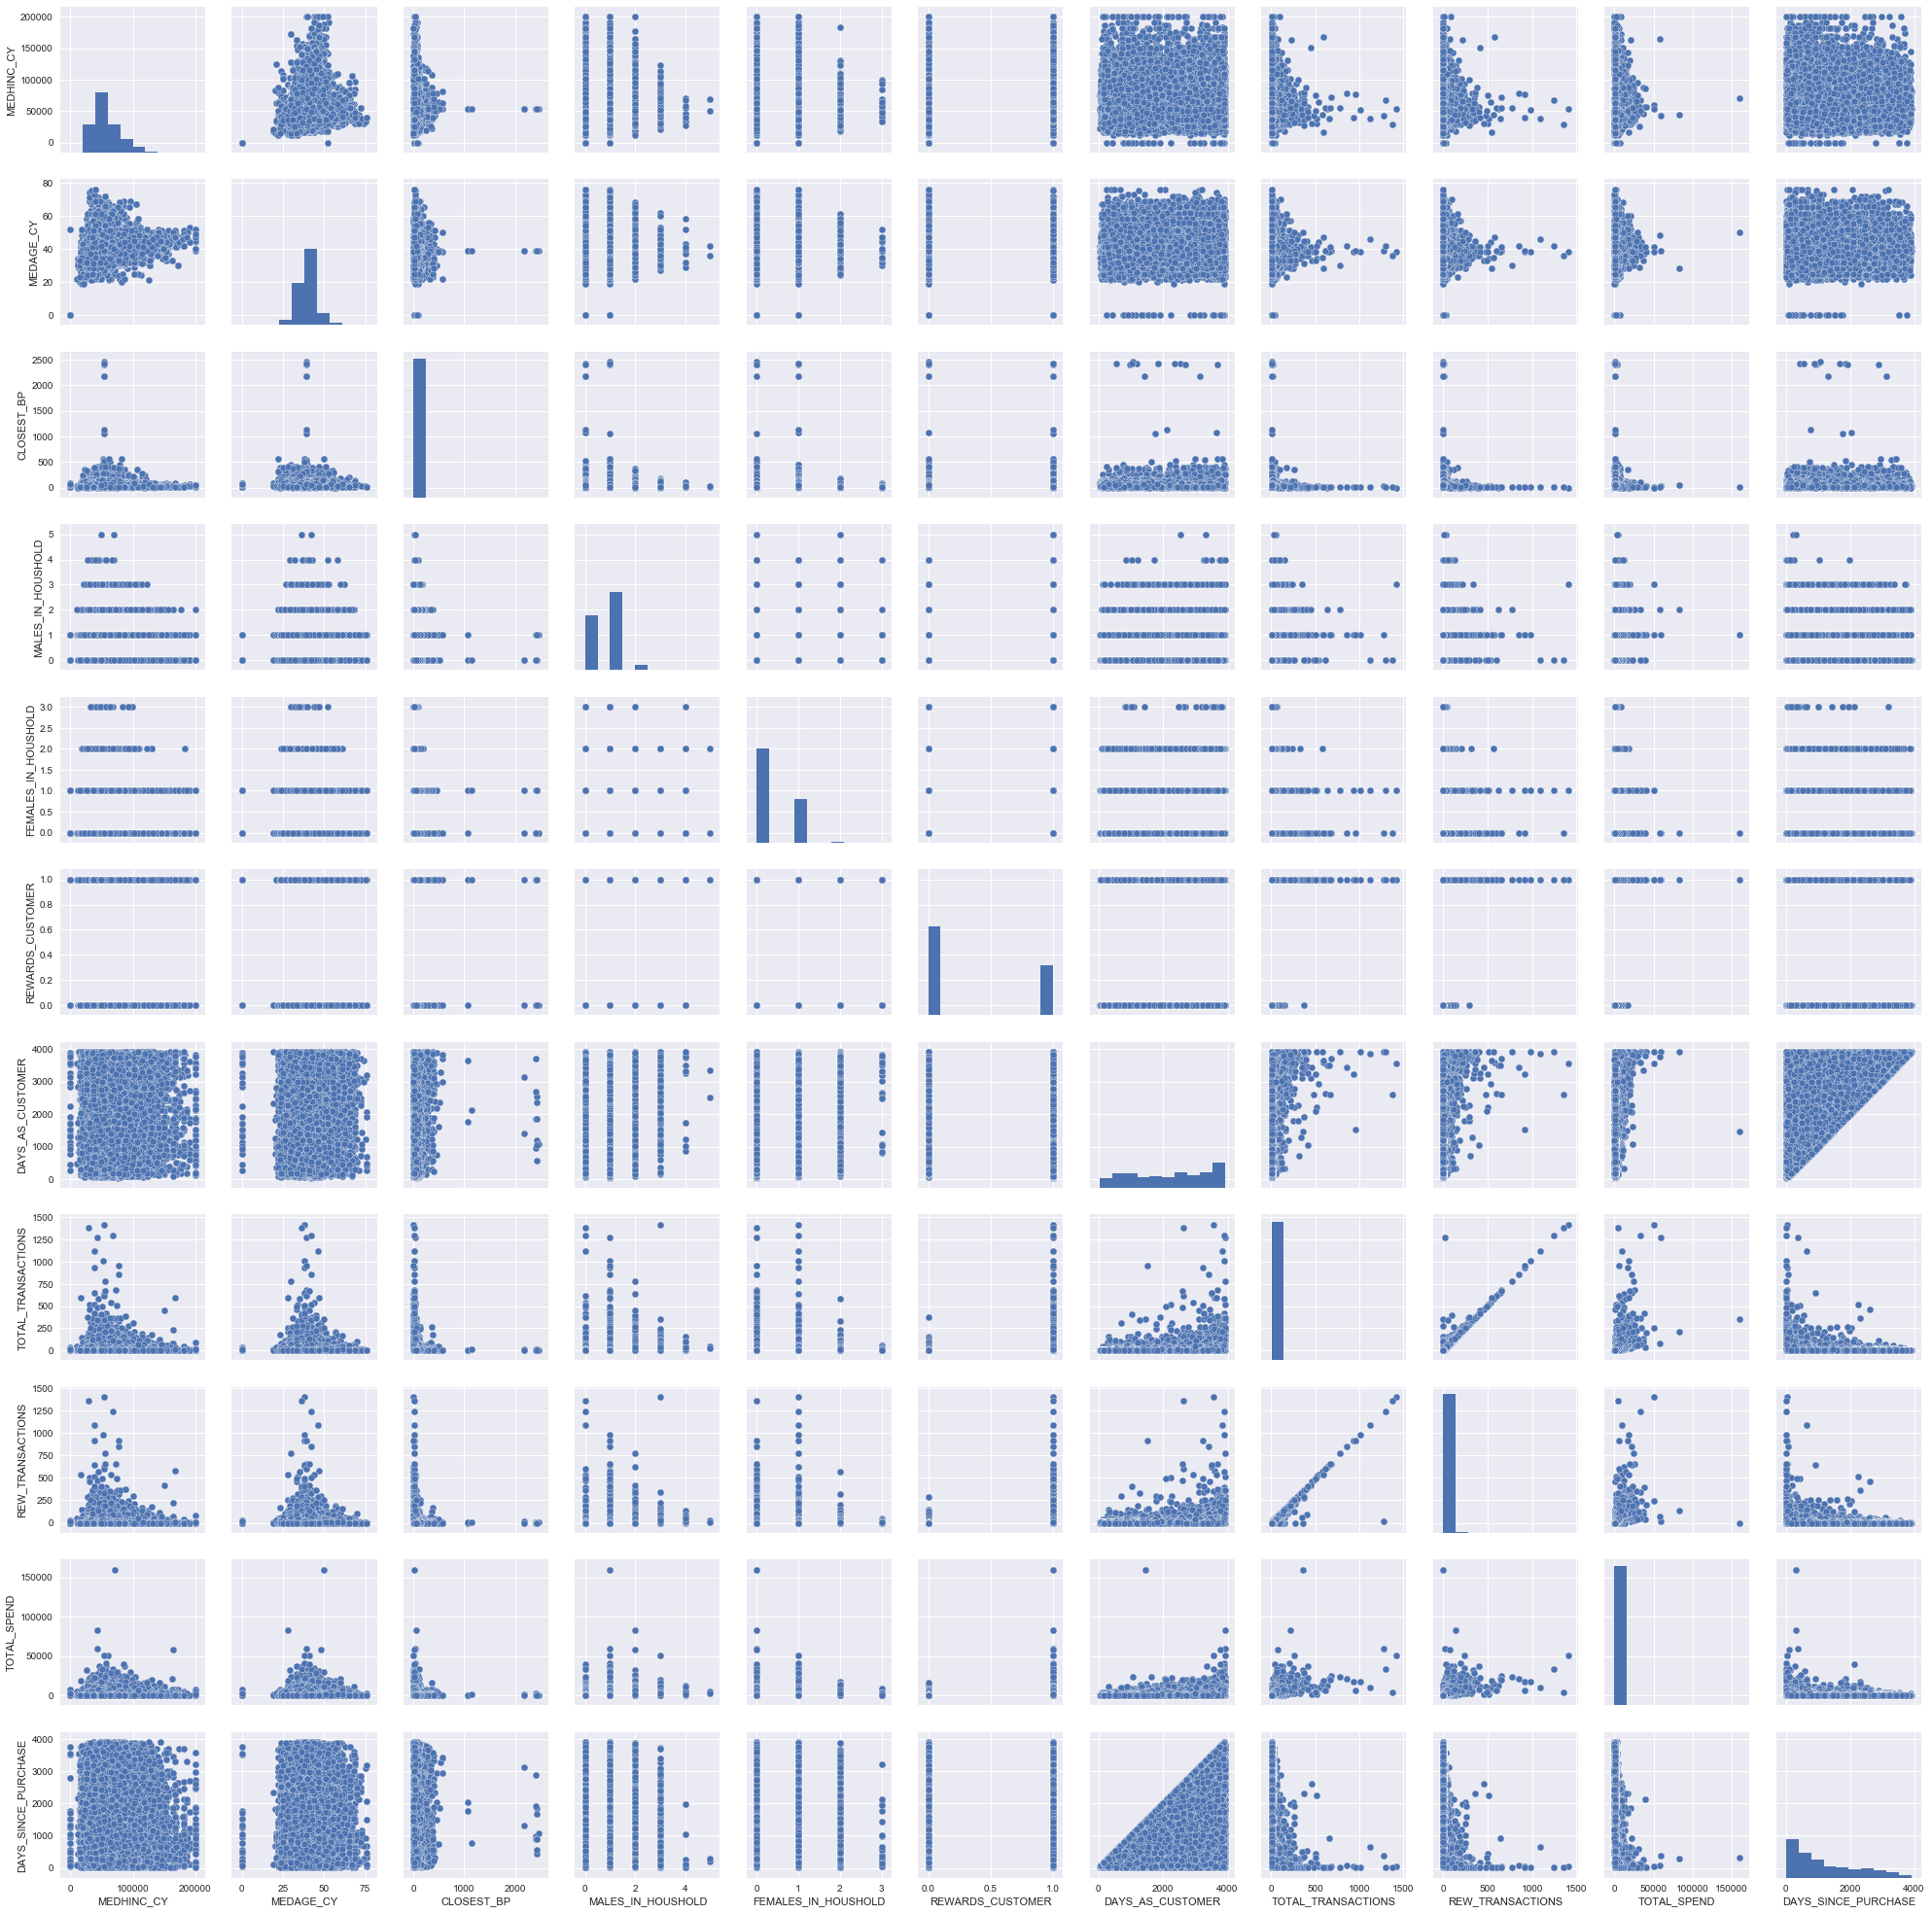

In [152]:
sns.pairplot(train_X)
#sns.plt.savefig('Scattermatrix.png')
plt.show()

In [156]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
train_X_std = stdsc.fit_transform(train_X)
test_X_std = stdsc.fit_transform(test_X)

#sns.pairplot(train_X_std)
#sns.plt.savefig('Scattermatrix.png')
#plt.show()

 1) DAYS_SINCE_PURCHASE            0.242334
 2) TOTAL_SPEND                    0.136206
 3) TOTAL_TRANSACTIONS             0.120303
 4) DAYS_AS_CUSTOMER               0.103608
 5) CLOSEST_BP                     0.096914
 6) MEDHINC_CY                     0.092341
 7) REW_TRANSACTIONS               0.084478
 8) MEDAGE_CY                      0.063818
 9) REWARDS_CUSTOMER               0.025971
10) MALES_IN_HOUSHOLD              0.019059
11) FEMALES_IN_HOUSHOLD            0.014970


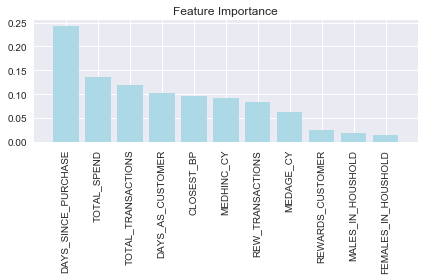

In [161]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = np.asarray(collist)

forests = RandomForestClassifier(n_estimators=10000,
                                random_state=0,
                                n_jobs=-1)
forests.fit(train_X_std, train_y)
importances = forests.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(train_X_std.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]],
                                      importances[indices[f]]))
    
plt.title('Feature Importance')
plt.bar(range(train_X_std.shape[1]), importances[indices], color='lightblue', align='center')
plt.xticks(range(train_X_std.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, train_X_std.shape[1]])
plt.tight_layout()
plt.show()

### XGBoost Model

[0]	eval-error:0.1623
Will train until eval-error hasn't improved in 100 rounds.
[1]	eval-error:0.155
[2]	eval-error:0.1442
[3]	eval-error:0.138867
[4]	eval-error:0.136633
[5]	eval-error:0.135467
[6]	eval-error:0.1352
[7]	eval-error:0.134833
[8]	eval-error:0.134833
[9]	eval-error:0.1345
[10]	eval-error:0.134
[11]	eval-error:0.134233
[12]	eval-error:0.134467
[13]	eval-error:0.134
[14]	eval-error:0.1338
[15]	eval-error:0.133733
[16]	eval-error:0.133833
[17]	eval-error:0.133267
[18]	eval-error:0.133367
[19]	eval-error:0.1339
[20]	eval-error:0.133533
[21]	eval-error:0.134333
[22]	eval-error:0.134133
[23]	eval-error:0.133833
[24]	eval-error:0.133567
[25]	eval-error:0.133633
[26]	eval-error:0.133667
[27]	eval-error:0.1332
[28]	eval-error:0.133033
[29]	eval-error:0.133267
[30]	eval-error:0.133233
[31]	eval-error:0.1334
[32]	eval-error:0.1334
[33]	eval-error:0.133133
[34]	eval-error:0.132967
[35]	eval-error:0.1334
[36]	eval-error:0.133
[37]	eval-error:0.133133
[38]	eval-error:0.133033
[39]	eva

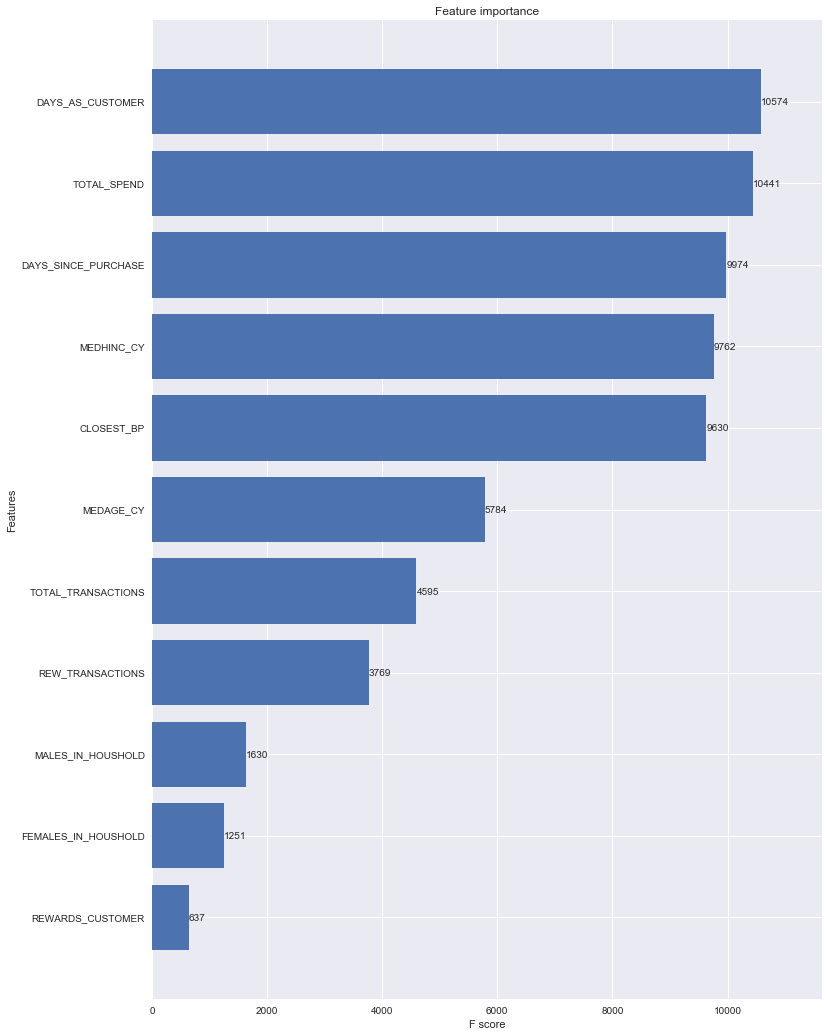

In [162]:
import xgboost as xgb

xgb_params = {
    'booster': 'dart',
    'eta': 0.01,
    'max_depth': 10,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'binary:logistic',
    'silent': 0,
    'seed' : 0,
    'eval_metric':'error',
    'max_delta_step' : 1
}
dtrain = xgb.DMatrix(train_X_std, train_y, feature_names=train_X.columns.values)
d_test = xgb.DMatrix(test_X_std, test_y, feature_names=test_X.columns.values)
model = xgb.train(xgb_params, dtrain, evals=[(d_test, "eval")], 
                  num_boost_round=1000, early_stopping_rounds=100)



fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, height=0.8, ax=ax)
plt.show()

In [163]:
pred_y = model.predict(d_test)

### Confusion matrix???

In [165]:
from sklearn.metrics import accuracy_score, confusion_matrix
predictions = [round(value) for value in pred_y]
# evaluate predictions
accuracy = accuracy_score(test_y, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

#conmat = confusion_matrix(y_test, predictions)
#print(conmat)
#plt.figure()
#helper.plot_confusion_matrix(conmat,classes = np.array(['0','1']), title='Confusion Matrix, no Normalization')

Accuracy: 86.69%


In [166]:
print(model.attributes())

{'best_iteration': '63', 'best_msg': '[63]\teval-error:0.1325', 'best_score': '0.1325'}


In [172]:
#modelcv = xgb.cv(xgb_params, dtrain, metrics=['auc'], verbose_eval=True, nfold = 10, 
#                  num_boost_round=1000, early_stopping_rounds=100, stratified=True)


In [73]:
#print(modelcv)

In [74]:
model.dump_model(fout=r'C:\users\pairwin\Documents\GitHub\IPy_Notebooks\Analyses\xgboost1.txt', with_stats=True)

### sklearn mlpclassifier

In [167]:
from sklearn.neural_network import MLPClassifier

In [168]:

clf = MLPClassifier(activation='logistic', early_stopping=True, learning_rate='adaptive', learning_rate_init=.0001, 
                    verbose=True, validation_fraction=0.1)
clf.fit(train_X_std, train_y)

Iteration 1, loss = 0.48322172
Validation score: 0.814143
Iteration 2, loss = 0.43920767
Validation score: 0.818571
Iteration 3, loss = 0.41134824
Validation score: 0.829714
Iteration 4, loss = 0.38936350
Validation score: 0.838714
Iteration 5, loss = 0.37371344
Validation score: 0.842000
Iteration 6, loss = 0.36363357
Validation score: 0.846429
Iteration 7, loss = 0.35742675
Validation score: 0.847143
Iteration 8, loss = 0.35348740
Validation score: 0.848571
Iteration 9, loss = 0.35080098
Validation score: 0.850143
Iteration 10, loss = 0.34874985
Validation score: 0.850857
Iteration 11, loss = 0.34714409
Validation score: 0.851143
Iteration 12, loss = 0.34579956
Validation score: 0.851429
Iteration 13, loss = 0.34464182
Validation score: 0.851286
Iteration 14, loss = 0.34365261
Validation score: 0.852571
Iteration 15, loss = 0.34278082
Validation score: 0.853143
Iteration 16, loss = 0.34204067
Validation score: 0.853143
Iteration 17, loss = 0.34139581
Validation score: 0.853429
Iterat

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='adaptive',
       learning_rate_init=0.0001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [169]:
pred_y = clf.predict(test_X_std)

accuracy = accuracy_score(test_y, pred_y)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.62%


In [170]:
clf.predict_proba(test_X_std)

array([[ 0.14276817,  0.85723183],
       [ 0.57737186,  0.42262814],
       [ 0.93198685,  0.06801315],
       ..., 
       [ 0.93193459,  0.06806541],
       [ 0.69055288,  0.30944712],
       [ 0.58447264,  0.41552736]])

In [77]:
np.all(np.isfinite(test_X))

True

In [79]:
np.any(np.isnan(test_X))

False